## Práctica Machine Learning 101 - Keepcoding

Juan David Pardo Pinzón

### Objetivo
Se requiere analizareln conjunto de datos de Airbnb mediante técnicas de machine learning para desarrollar un modelo predictivo del precio de alquileres en Madrid
nte. Modeladones.

Utilizaré la libreria de "scikit-learn" para la división de datos. 

In [7]:
pip install -U scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 435.7 kB/s eta 0:00:25
    --------------------------------------- 0.1/10.6 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 0.9/10.6 MB 7.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 10.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/10.6 MB 13.9 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.6 MB 15.7 MB/s eta 0:00:01
   ---------------------- ----------------- 6.1/10.6 MB 18.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.8/10.6 MB 20.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.5/10.6 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 28.5 MB/s eta 0:00:00
 

1. Preparación de datos: División train/test

In [330]:
# Importar librerías 
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

warnings.filterwarnings('ignore')

# Utilizar una cadena de texto cruda para evitar problemas con barras invertidas
file_path = r'C:\Users\pardo\Documents\BigData_AI_MachineLearning_FullStackBootcamp_2023\12.Machine Learning\machine-learning-101-main\project\airbnb-listings-extract.csv'

# Intentar cargar el archivo con diferentes encodings
encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings_to_try:
    try:
        # Intentar cargar el archivo con el encoding actual
        airbnb_df = pd.read_csv(file_path, sep=';', decimal='.', encoding=encoding)
        # Si tiene éxito, imprime el encoding y muestra las primeras filas
        print(f"Archivo cargado exitosamente con encoding: {encoding}")
        break  # Sale del bucle si no hay errores
    except UnicodeDecodeError:
        # Si hay un error, intentar con el siguiente encoding
        print(f"Error al intentar cargar con encoding {encoding}. Intentando con otro.")

Error al intentar cargar con encoding utf-8. Intentando con otro.
Archivo cargado exitosamente con encoding: ISO-8859-1


procedemos a dividir la información en conjuntos de entrenamiento y prueba.

In [331]:
train_airbnb_df, test_airbnb_df = train_test_split(airbnb_df, test_size=0.3, random_state=42)

# Imprimir la dimensión de los dataframe

print("Dimensión del dataframe airbnb_df con el 100% de las muestras:", airbnb_df.shape)
print("Dimensión del dataframe train_airbnb_df_madrid con el 70% de las muestras:", train_airbnb_df.shape)
print("Dimensión del dataframe test_airbnb_df_madrid con el 30% de las muestras:", test_airbnb_df.shape)

Dimensión del dataframe airbnb_df con el 100% de las muestras: (14780, 89)
Dimensión del dataframe train_airbnb_df_madrid con el 70% de las muestras: (10346, 89)
Dimensión del dataframe test_airbnb_df_madrid con el 30% de las muestras: (4434, 89)


Se valida el tipo de datos con el que trabajara en dataset.

In [332]:
import pandas as pd

# Obtiene el valor actual del número máximo de filas
max_rows = pd.get_option('display.max_rows')

# Imprime el valor actual del número máximo de filas
print(f'Número máximo de filas: {max_rows}')

# Suponiendo que airbnb_df es tu DataFrame
# Puedes usar set_option para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Muestra los tipos de datos de todas las columnas
train_airbnb_df.info()

Número máximo de filas: None
<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 1584 to 7270
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10346 non-null  int64  
 1   listing url                     10346 non-null  object 
 2   scrape id                       10346 non-null  object 
 3   last scraped                    10346 non-null  object 
 4   name                            10345 non-null  object 
 5   summary                         9918 non-null   object 
 6   space                           7616 non-null   object 
 7   description                     10342 non-null  object 
 8   experiences offered             10346 non-null  object 
 9   neighborhood overview           6399 non-null   object 
 10  notes                           3922 non-null   object 
 11  transit                         6327 non-null   object 
 12  access

Se encontró que la gran mayoría de los datos se encuentran distribuidos en España

In [333]:
countries = train_airbnb_df['country'].value_counts()
print(countries)

country
Spain             9805
United States      134
United Kingdom     114
France              73
Italy               48
Australia           32
Germany             30
Ireland             27
Austria             19
Netherlands         18
Belgium             12
Canada              12
Denmark              9
Switzerland          4
Greece               4
Hong Kong            3
Cuba                 1
Name: count, dtype: int64


Al llevar a cabo un análisis más exhaustivo de los datos de España, se observó que prácticamente la totalidad de la información se origina en la ciudad de Madrid.

In [334]:
import pandas as pd

# Filtrar solo las filas correspondientes a Spain
spain_data = train_airbnb_df[train_airbnb_df['country'] == 'Spain']

# Obtener el número de registros por ciudad en Spain
city_counts = spain_data['city'].value_counts()

# Mostrar la lista de número de registros por ciudad
print("Número de registros de Spain por ciudad:")
print(city_counts)


Número de registros de Spain por ciudad:
city
Madrid                                 9252
Barcelona                               204
Palma                                    37
é©¬å¾·é                                36
AlcÃºdia                                 25
Inca                                     12
Palma de Mallorca                        12
Madrid, Comunidad de Madrid, ES          12
DeiÃ                                      8
Selva                                     7
PollenÃ§a                                 7
Valldemossa                               6
Sant LlorenÃ§ des Cardassar               6
SÃ³ller                                   6
Campanet                                  6
madrid                                    6
Petra                                     4
Can Pastilla                              4
Felanitx                                  4
Pollensa                                  4
Pozuelo de AlarcÃ³n                       4
Manacor                       

Se identificó la necesidad de realizar ajustes en varios registros del conjunto de datos para lograr una normalización completa de todos los registros correspondientes a Madrid.

In [335]:
import pandas as pd

# Definir los nombres incorrectos que quieres reemplazar por 'Madrid'
incorrect_names = ['Chueca, Madrid','é©¬å¾·é','las matas  madrid','Comunidad de Madrid','Centro, Madrid','Delicias-Madrid','Aravaca (Madrid)','Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'Madri', 'Madid','Madrid, Vallecas (FontarrÃ³n)','Madrid, Comunidad de Madrid, ESPANA']

# Filtrar solo las filas correspondientes a 'Spain'
spain_data_fix = train_airbnb_df[train_airbnb_df['country'] == 'Spain']

# Utilizar .loc para evitar el SettingWithCopyWarning
spain_data_fix.loc[:, 'city'] = spain_data_fix['city'].replace(incorrect_names, 'Madrid')

# Mostrar la lista actualizada de registros por ciudad en Spain
city_counts = spain_data_fix['city'].value_counts()
print("Número de registros de Spain por ciudad (actualizado):")
print(city_counts)

Número de registros de Spain por ciudad (actualizado):
city
Madrid                                 9314
Barcelona                               204
Palma                                    37
AlcÃºdia                                 25
Inca                                     12
Palma de Mallorca                        12
DeiÃ                                      8
Selva                                     7
PollenÃ§a                                 7
Valldemossa                               6
Sant LlorenÃ§ des Cardassar               6
SÃ³ller                                   6
Campanet                                  6
Santa Maria del CamÃ­                     4
LlubÃ­                                    4
Manacor                                   4
La Puebla                                 4
BÃºger                                    4
Santa Margalida                           4
Can Pastilla                              4
Pozuelo de AlarcÃ³n                       4
Can Picafort    

In [336]:
# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Imprimir las primeras 10 filas junto con todas las columnas
spain_data_fix.head(2).T

,1584,9780
id,15606318,13344738
listing url,https://www.airbnb.com/rooms/15606318,https://www.airbnb.com/rooms/13344738
scrape id,"2,02E+13","2,02E+13"
last scraped,08/04/2017,08/04/2017
name,Clean and quiet room in an attic.Close to Bern...,Cozy Apartment Downtown Madrid
summary,Room with a bed (90 x 190 ) in a very bright a...,Very cozy apartment next to Chueca and Gran vÃ...
space,The tranquility of the building and tidiness o...,The apartment is located in one of the most at...
description,Room with a bed (90 x 190 ) in a very bright a...,Very cozy apartment next to Chueca and Gran vÃ...
experiences offered,none,none
neighborhood overview,"Central, well connected and with all kinds of ...",NaN


Se procede a eliminar todas las filas que no corresponden a Madrid con el objetivo de centrar nuestro análisis en la ciudad que presenta la mayor cantidad de datos disponibles.

In [337]:
import pandas as pd

def filter_madrid(data_frame):
    # Filtrar solo las filas correspondientes a 'Spain'
    spain_data_fix = data_frame[data_frame['country'] == 'Spain']

    # Filtrar las filas donde 'City' sea 'Madrid'
    madrid_data_fix = spain_data_fix[spain_data_fix['city'] == 'Madrid']

    return madrid_data_fix

# Llama a la función para filtrar Madrid y almacenar en airbnb_df_madrid
airbnb_df_madrid = filter_madrid(spain_data)
# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

airbnb_df_madrid.head(5).T

,1584,9780,12615,9558,1975
id,15606318,13344738,14113692,7022536,4838000
listing url,https://www.airbnb.com/rooms/15606318,https://www.airbnb.com/rooms/13344738,https://www.airbnb.com/rooms/14113692,https://www.airbnb.com/rooms/7022536,https://www.airbnb.com/rooms/4838000
scrape id,"2,02E+13","2,02E+13","2,02E+13","2,02E+13","2,02E+13"
last scraped,08/04/2017,08/04/2017,08/04/2017,08/04/2017,08/04/2017
name,Clean and quiet room in an attic.Close to Bern...,Cozy Apartment Downtown Madrid,Apartamento en PrÃ­cipe de Vergara,3 Room Madrid CENTER QUEVEDO,"OLAVIDE XIV, 4ÂºC, Friendly Rentals"
summary,Room with a bed (90 x 190 ) in a very bright a...,Very cozy apartment next to Chueca and Gran vÃ...,"Amplio apartamento con encanto muy luminoso, r...","Flat in the heart of Madrid, next to Plaza de ...",This apartment in an upmarket building will me...
space,The tranquility of the building and tidiness o...,The apartment is located in one of the most at...,"Amplio apartamento con encanto muy luminoso, r...","Flat in the heart of Madrid, next to Plaza de ...",This lovely apartment is one of several we can...
description,Room with a bed (90 x 190 ) in a very bright a...,Very cozy apartment next to Chueca and Gran vÃ...,"Amplio apartamento con encanto muy luminoso, r...","Flat in the heart of Madrid, next to Plaza de ...",This apartment in an upmarket building will me...
experiences offered,none,none,none,none,none
neighborhood overview,"Central, well connected and with all kinds of ...",NaN,Vuestra casa se encuentra en el distrito de Ch...,Muy tranquilo y a 2 minutos andando de MalasaÃ...,This apartment in an upmarket building will me...


Validando se encuentre el total de los datos de Madrid

In [338]:
# Mostrar la lista actualizada de registros por ciudad en Spain
city_counts = airbnb_df_madrid['city'].value_counts()
print("Número de registros de Spain por ciudad (actualizado):")
print(city_counts)

Número de registros de Spain por ciudad (actualizado):
city
Madrid    9252
Name: count, dtype: int64


In [339]:
countries_fix = airbnb_df_madrid['country'].value_counts()
print(countries_fix)

country
Spain    9252
Name: count, dtype: int64


In [340]:
airbnb_df_madrid.head(3).T

,1584,9780,12615
id,15606318,13344738,14113692
listing url,https://www.airbnb.com/rooms/15606318,https://www.airbnb.com/rooms/13344738,https://www.airbnb.com/rooms/14113692
scrape id,"2,02E+13","2,02E+13","2,02E+13"
last scraped,08/04/2017,08/04/2017,08/04/2017
name,Clean and quiet room in an attic.Close to Bern...,Cozy Apartment Downtown Madrid,Apartamento en PrÃ­cipe de Vergara
summary,Room with a bed (90 x 190 ) in a very bright a...,Very cozy apartment next to Chueca and Gran vÃ...,"Amplio apartamento con encanto muy luminoso, r..."
space,The tranquility of the building and tidiness o...,The apartment is located in one of the most at...,"Amplio apartamento con encanto muy luminoso, r..."
description,Room with a bed (90 x 190 ) in a very bright a...,Very cozy apartment next to Chueca and Gran vÃ...,"Amplio apartamento con encanto muy luminoso, r..."
experiences offered,none,none,none
neighborhood overview,"Central, well connected and with all kinds of ...",NaN,Vuestra casa se encuentra en el distrito de Ch...


Después de llevar a cabo una validación preliminar de los datos, opté por realizar una depuración de la información antes de proceder con la división del conjunto en datos de entrenamiento y prueba. Durante este proceso de validación, observé que no todos los datos son relevantes para el análisis, considerando especialmente la variable objetivo.

Finalmente, llevamos a cabo un análisis de las variables que presentan un mayor número de valores faltantes en el conjunto de datos, con el objetivo de garantizar la inclusión de las variables más apropiadas en nuestro análisis.

Se calcula el número de NaN contenido en el dataset y su importancia porcentual:

In [341]:
import pandas as pd

# Contar el número de NaN por columnas
nan_counts = train_airbnb_df.isnull().sum()

# Calcular el porcentaje de NaN por columnas
nan_percentage = (nan_counts / len(train_airbnb_df)) * 100

# Crear un nuevo DataFrame con la información de NaN y porcentaje
nan_info = pd.DataFrame({
    'NaN Count': nan_counts,
    'NaN Percentage': nan_percentage
})

# Ordenar de mayor a menor porcentaje
nan_info_sorted = nan_info.sort_values(by='NaN Percentage', ascending=False)

# Imprimir la salida completa ordenada
pd.set_option('display.max_rows', None) 
print(nan_info_sorted)

                                NaN Count  NaN Percentage
has availability                    10336       99.903344
host acceptance rate                10316       99.710033
jurisdiction names                  10191       98.501836
license                             10099       97.612604
square feet                          9939       96.066113
monthly price                        7828       75.662092
weekly price                         7808       75.468780
notes                                6424       62.091630
security deposit                     5982       57.819447
interaction                          4578       44.248985
access                               4537       43.852697
cleaning fee                         4251       41.088343
transit                              4019       38.845931
neighborhood overview                3947       38.150010
neighbourhood                        3693       35.694955
host about                           3679       35.559637
house rules   

Considerando la utilidad del campo 'host since', hemos decidido dividirlo en cuatro columnas: día del mes, día de la semana, mes y año. Estas columnas adicionales pueden ser de utilidad posteriormente para realizar el análisis de los datos.

In [342]:
import pandas as pd

airbnb_df_madrid['host since'] = pd.to_datetime(airbnb_df_madrid['host since'], errors='coerce')
airbnb_df_madrid['calendar updated'] = pd.to_datetime(airbnb_df_madrid['calendar updated'], errors='coerce')

# Crear nuevas columnas 'host_since_year', 'host_since_month', y 'host_since_day'
airbnb_df_madrid['host_since_year'] = airbnb_df_madrid['host since'].dt.year
airbnb_df_madrid['host_since_month'] = airbnb_df_madrid['host since'].dt.month
airbnb_df_madrid['host_since_day'] = airbnb_df_madrid['host since'].dt.day
airbnb_df_madrid['host_since_weekday'] = airbnb_df_madrid['host since'].dt.dayofweek + 1

#Mostrar el DataFrame resultante
airbnb_df_madrid[['host since', 'host_since_year', 'host_since_month','host_since_weekday', 'host_since_day']].head().T

,1584,9780,12615,9558,1975
host since,2015-04-24 00:00:00,2016-06-03 00:00:00,2016-07-20 00:00:00,2014-12-02 00:00:00,2014-09-19 00:00:00
host_since_year,2015.0,2016.0,2016.0,2014.0,2014.0
host_since_month,4.0,6.0,7.0,12.0,9.0
host_since_weekday,5.0,5.0,3.0,2.0,5.0
host_since_day,24.0,3.0,20.0,2.0,19.0


Se transformaron algunas variables cardinales a formato numérico con el propósito de facilitar su inclusión en el análisis.

In [343]:
import pandas as pd

# Definir el diccionario de mapeo ordinal
ordinal_mapping_expoff = {
    'none': 1,
    'business': 2,
    'family': 3,
    'social': 4,
    'romantic': 5
}
ordinal_mapping_hrt = {
    'within an hour': 1,
    'within a day': 2,
    'within a few hours': 3,
    '': 4,
    'a few days or more': 5
}

ordinal_mapping_proType = {
    'Loft': 1,
    'Apartment': 2,
    'House': 3,
    'Condominium': 4,
    'Camper/RV': 5,
    'Other': 6,
    'Dorm': 7,
    'Bed & Breakfast': 8,
    'Tent': 9,
    'Boat': 10,
    'Guesthouse': 11,
    'Villa': 12,
    'Hostel': 13,
    'Townhouse': 14,
    'Chalet': 15,
    'Serviced apartment': 16,
    'Bungalow': 17,
    'Boutique hotel': 18,
    'Guest suite': 19,
    'Casa particular': 20,
    'Timeshare': 21,
    'Earth House': 22
}

ordinal_mapping_roomType = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3
}

ordinal_mapping_bedType = {
    'Real Bed': 1,
    'Pull-out Sofa': 2,
    'Futon': 3,
    'Couch': 4,
    'Airbed': 5
}

ordinal_mapping_cancelPol = {
    'moderate': 1,
    'super_strict_30': 2,
    'strict': 3,
    'flexible': 4,
    'flexible_new': 5,
    'super_strict_60': 6,
    'strict_new': 7,
    'moderate_new': 8
}


# Aplicar el mapeo a la columna 
airbnb_df_madrid['experiences offered'] = airbnb_df_madrid['experiences offered'].map(ordinal_mapping_expoff)
airbnb_df_madrid['host response time'] = airbnb_df_madrid['host response time'].map(ordinal_mapping_hrt)
airbnb_df_madrid['property type'] = airbnb_df_madrid['property type'].map(ordinal_mapping_proType)
airbnb_df_madrid['room type'] = airbnb_df_madrid['room type'].map(ordinal_mapping_roomType)
airbnb_df_madrid['bed type'] = airbnb_df_madrid['bed type'].map(ordinal_mapping_bedType)
airbnb_df_madrid['cancellation policy'] = airbnb_df_madrid['cancellation policy'].map(ordinal_mapping_cancelPol)

# Imprimir el DataFrame resultante
airbnb_df_madrid[['experiences offered','host response time','property type','room type','bed type','cancellation policy']].head().T

,1584,9780,12615,9558,1975
experiences offered,1.0,1.0,1.0,1.0,1.0
host response time,1.0,1.0,3.0,1.0,3.0
property type,3.0,2.0,2.0,2.0,2.0
room type,2.0,1.0,1.0,1.0,1.0
bed type,1.0,1.0,1.0,1.0,1.0
cancellation policy,1.0,1.0,1.0,1.0,3.0


El tipo de dato de las variables "latitude" y "longitude" fue modificado con el objetivo de incorporarlas en el análisis.

In [344]:
# Convertir 'Latitud' a tipo float
airbnb_df_madrid['latitude'] = airbnb_df_madrid['latitude'].str.replace('.', '').astype(float)
# Convertir 'Longitud' a tipo float
airbnb_df_madrid['longitude'] = airbnb_df_madrid['longitude'].str.replace('.', '').astype(float)
# Imprimir el DataFrame resultante

airbnb_df_madrid[['latitude','longitude']].head().T

,1584,9780,12615,9558,1975
latitude,4.045434e+14,4.042213e+16,4.043860e+15,4.043084e+15,4.043419e+15
longitude,-3.681293e+16,-3.700504e+15,-3.678499e+16,-3.701177e+16,-3.702951e+15


Vamos a proceder a eliminar las columnas que no son relevantes para nuestro análisis. Es importante destacar que, en el caso de las variables creadas a partir de las columnas "feature" y "amenities", el criterio de selección consiste en eliminar aquellas categorías cuyo conteo total represente menos del 50% de la muestra.

In [345]:
useful_data = ['id', 'listing url', 'scrape id', 'last scraped', 'summary', 'space', 'description',
               'neighborhood overview', 'notes', 'transit', 'access', 'interaction', 'house rules',
               'thumbnail url', 'medium url', 'picture url', 'xl picture url', 'host id', 'host url',
               'host name', 'host location', 'host thumbnail url', 'host picture url',
               'host neighbourhood', 'neighbourhood group cleansed',
               'city', 'market', 'country code', 'country', 'has availability', 'license', 'jurisdiction names','street',
               'zipcode','state','smart location','host acceptance rate','name','host since','host verifications','host about',
               'first review', 'last review', 'calendar last scraped', 'geolocation'
              ]


# Convertir nombres de columnas en DataFrame a minúsculas
airbnb_df_madrid.columns = airbnb_df_madrid.columns.str.lower()
useful_data_lower = [column.lower() for column in useful_data]

# Eliminar las columnas
airbnb_df_madrid.drop(useful_data_lower, axis=1, inplace=True)

# Validar si se eliminaron o no correctamente los datos
if all(column not in airbnb_df_madrid.columns for column in useful_data_lower):
    print("Columnas eliminadas correctamente.")
else:
    print("Columnas no encontradas en el DataFrame.")


Columnas eliminadas correctamente.


Verificamos que las variables que no son objeto de análisis se hayan eliminado correctamente.

In [346]:
airbnb_df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9252 entries, 1584 to 7270
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   experiences offered             9252 non-null   int64         
 1   host response time              8069 non-null   float64       
 2   host response rate              8069 non-null   float64       
 3   host listings count             9250 non-null   float64       
 4   host total listings count       9250 non-null   float64       
 5   neighbourhood                   6102 non-null   object        
 6   neighbourhood cleansed          9252 non-null   object        
 7   latitude                        9252 non-null   float64       
 8   longitude                       9252 non-null   float64       
 9   property type                   9252 non-null   int64         
 10  room type                       9252 non-null   int64         
 11  accomm

In [347]:
airbnb_df_madrid.head(5)

,experiences offered,host response time,host response rate,host listings count,host total listings count,neighbourhood,neighbourhood cleansed,latitude,longitude,property type,room type,accommodates,bathrooms,bedrooms,beds,bed type,amenities,square feet,price,weekly price,monthly price,security deposit,cleaning fee,guests included,extra people,minimum nights,maximum nights,calendar updated,availability 30,availability 60,availability 90,availability 365,number of reviews,review scores rating,review scores accuracy,review scores cleanliness,review scores checkin,review scores communication,review scores location,review scores value,cancellation policy,calculated host listings count,reviews per month,features,host_since_year,host_since_month,host_since_day,host_since_weekday
1584,1,1.0,100.0,1.0,1.0,NaN,HispanoamÃ©rica,4.045434e+14,-3.681293e+16,3,2,1,1.0,1.0,1.0,1,"TV,Internet,Wireless Internet,Air conditioning...",NaN,41.0,NaN,NaN,NaN,NaN,1,0,2,1125,2024-02-04 17:13:01.054405,9,9,11,11,4,100.0,10.0,10.0,10.0,10.0,9.0,9.0,1,1.0,0.71,"Host Is Superhost,Host Has Profile Pic,Host Id...",2015.0,4.0,24.0,5.0
9780,1,1.0,100.0,1.0,1.0,NaN,Justicia,4.042213e+16,-3.700504e+15,2,1,2,1.0,0.0,1.0,1,"TV,Internet,Wireless Internet,Air conditioning...",NaN,70.0,NaN,NaN,100.0,20.0,1,0,2,1125,NaT,2,13,26,117,26,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.0,2.73,"Host Is Superhost,Host Has Profile Pic,Require...",2016.0,6.0,3.0,5.0
12615,1,3.0,88.0,1.0,1.0,Prosperidad,Prosperidad,4.043860e+15,-3.678499e+16,2,1,4,1.0,1.0,2.0,1,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,100.0,NaN,NaN,100.0,NaN,1,0,2,30,NaT,0,0,0,0,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.0,1.93,"Host Is Superhost,Host Has Profile Pic,Host Id...",2016.0,7.0,20.0,3.0
9558,1,1.0,96.0,2.0,2.0,NaN,Trafalgar,4.043084e+15,-3.701177e+16,2,1,4,1.0,3.0,3.0,1,"TV,Wireless Internet,Kitchen,Buzzer/wireless i...",NaN,49.0,NaN,NaN,89.0,12.0,2,10,1,1125,NaT,6,6,9,9,81,82.0,9.0,9.0,9.0,9.0,9.0,8.0,1,2.0,3.77,"Host Has Profile Pic,Host Identity Verified,Re...",2014.0,12.0,2.0,2.0
1975,1,3.0,75.0,164.0,164.0,Trafalgar,Trafalgar,4.043419e+15,-3.702951e+15,2,1,6,2.0,2.0,4.0,1,"TV,Internet,Wireless Internet,Air conditioning...",NaN,130.0,NaN,2500.0,200.0,60.0,2,10,2,1125,2024-02-04 17:13:01.054405,10,40,70,345,1,80.0,8.0,10.0,8.0,8.0,8.0,6.0,3,145.0,0.04,"Host Has Profile Pic,Is Location Exact,Require...",2014.0,9.0,19.0,5.0


2. Análisis exploratorio

Realizamos un gráfico de correlación inicial.

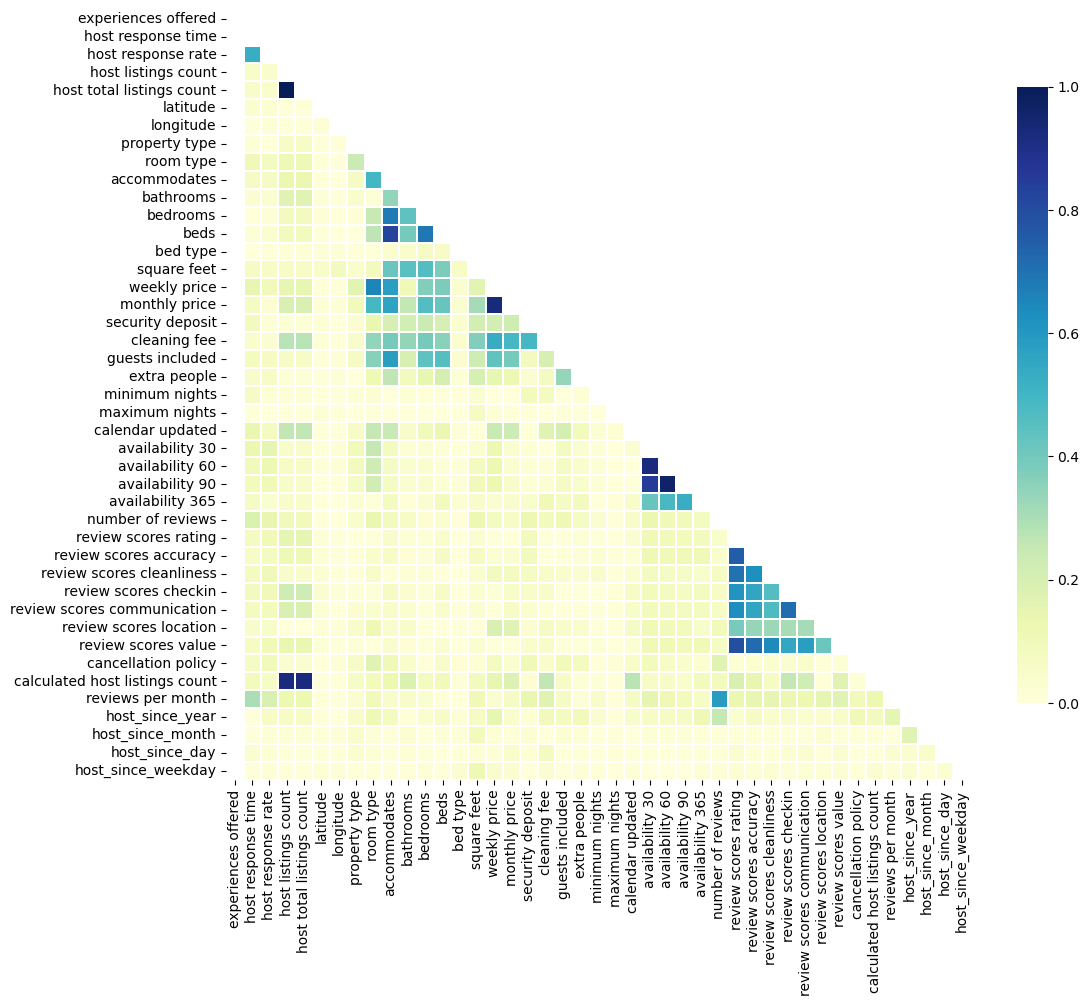

In [285]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que train_airbnb_df_madrid es tu DataFrame

# Eliminar la columna 'price' y las variables ordinales para calcular la correlación
columns_to_exclude = ['price','neighbourhood','neighbourhood cleansed','features','amenities']

corr = np.abs(airbnb_df_madrid.drop(columns_to_exclude, axis=1).corr())

# Generar una máscara para la mitad superior
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibujar el mapa de calor con la máscara y la proporción correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Procedemos a eliminar algunas variables a fin de mejorar el analisis 

In [348]:
reviews = airbnb_df_madrid.loc[: , "review scores accuracy":"review scores value"]
airbnb_df_madrid['average scores review'] = reviews.mean(axis=1)

airbnb_df_madrid.drop(['availability 30', 'availability 60', 'availability 90', 
         'review scores accuracy', 'review scores cleanliness', 'review scores checkin',
       'review scores communication', 'review scores location', 'review scores value'], axis=1, inplace=True)

airbnb_df_madrid.head().T

,1584,9780,12615,9558,1975
experiences offered,1,1,1,1,1
host response time,1.0,1.0,3.0,1.0,3.0
host response rate,100.0,100.0,88.0,96.0,75.0
host listings count,1.0,1.0,1.0,2.0,164.0
host total listings count,1.0,1.0,1.0,2.0,164.0
neighbourhood,NaN,NaN,Prosperidad,NaN,Trafalgar
neighbourhood cleansed,HispanoamÃ©rica,Justicia,Prosperidad,Trafalgar,Trafalgar
latitude,404543369356457.0,40422129842040400.0,4043860440145280.0,4043084474125310.0,4043419127175490.0
longitude,-36812926278309400.0,-3700504457160720.0,-36784988028011600.0,-37011774206591800.0,-3702950612367890.0
property type,3,2,2,2,2


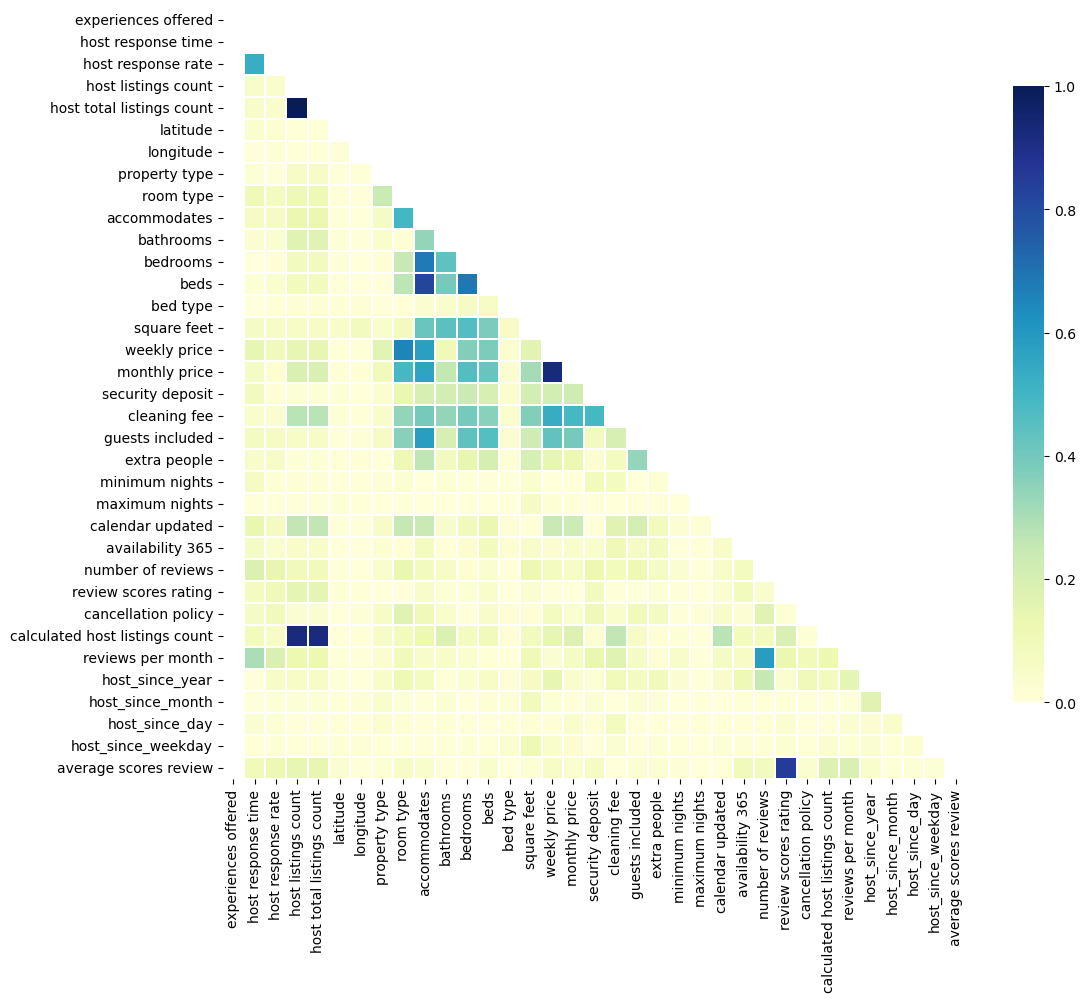

In [287]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que train_airbnb_df_madrid es tu DataFrame

# Eliminar la columna 'price' para calcular la correlación
columns_to_exclude = ['price','neighbourhood','neighbourhood cleansed','features','amenities']

corr = np.abs(airbnb_df_madrid.drop(columns_to_exclude, axis=1).corr())

# Generar una máscara para la mitad superior
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibujar el mapa de calor con la máscara y la proporción correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Para obtener una visión comprensiva de las relaciones entre las variables en cuestión, realizamos un scatter plot que muestre cada variable en comparación con las demás. No obstante, debido al considerable número de variables, la distinción entre ellas se vuelve complicada.

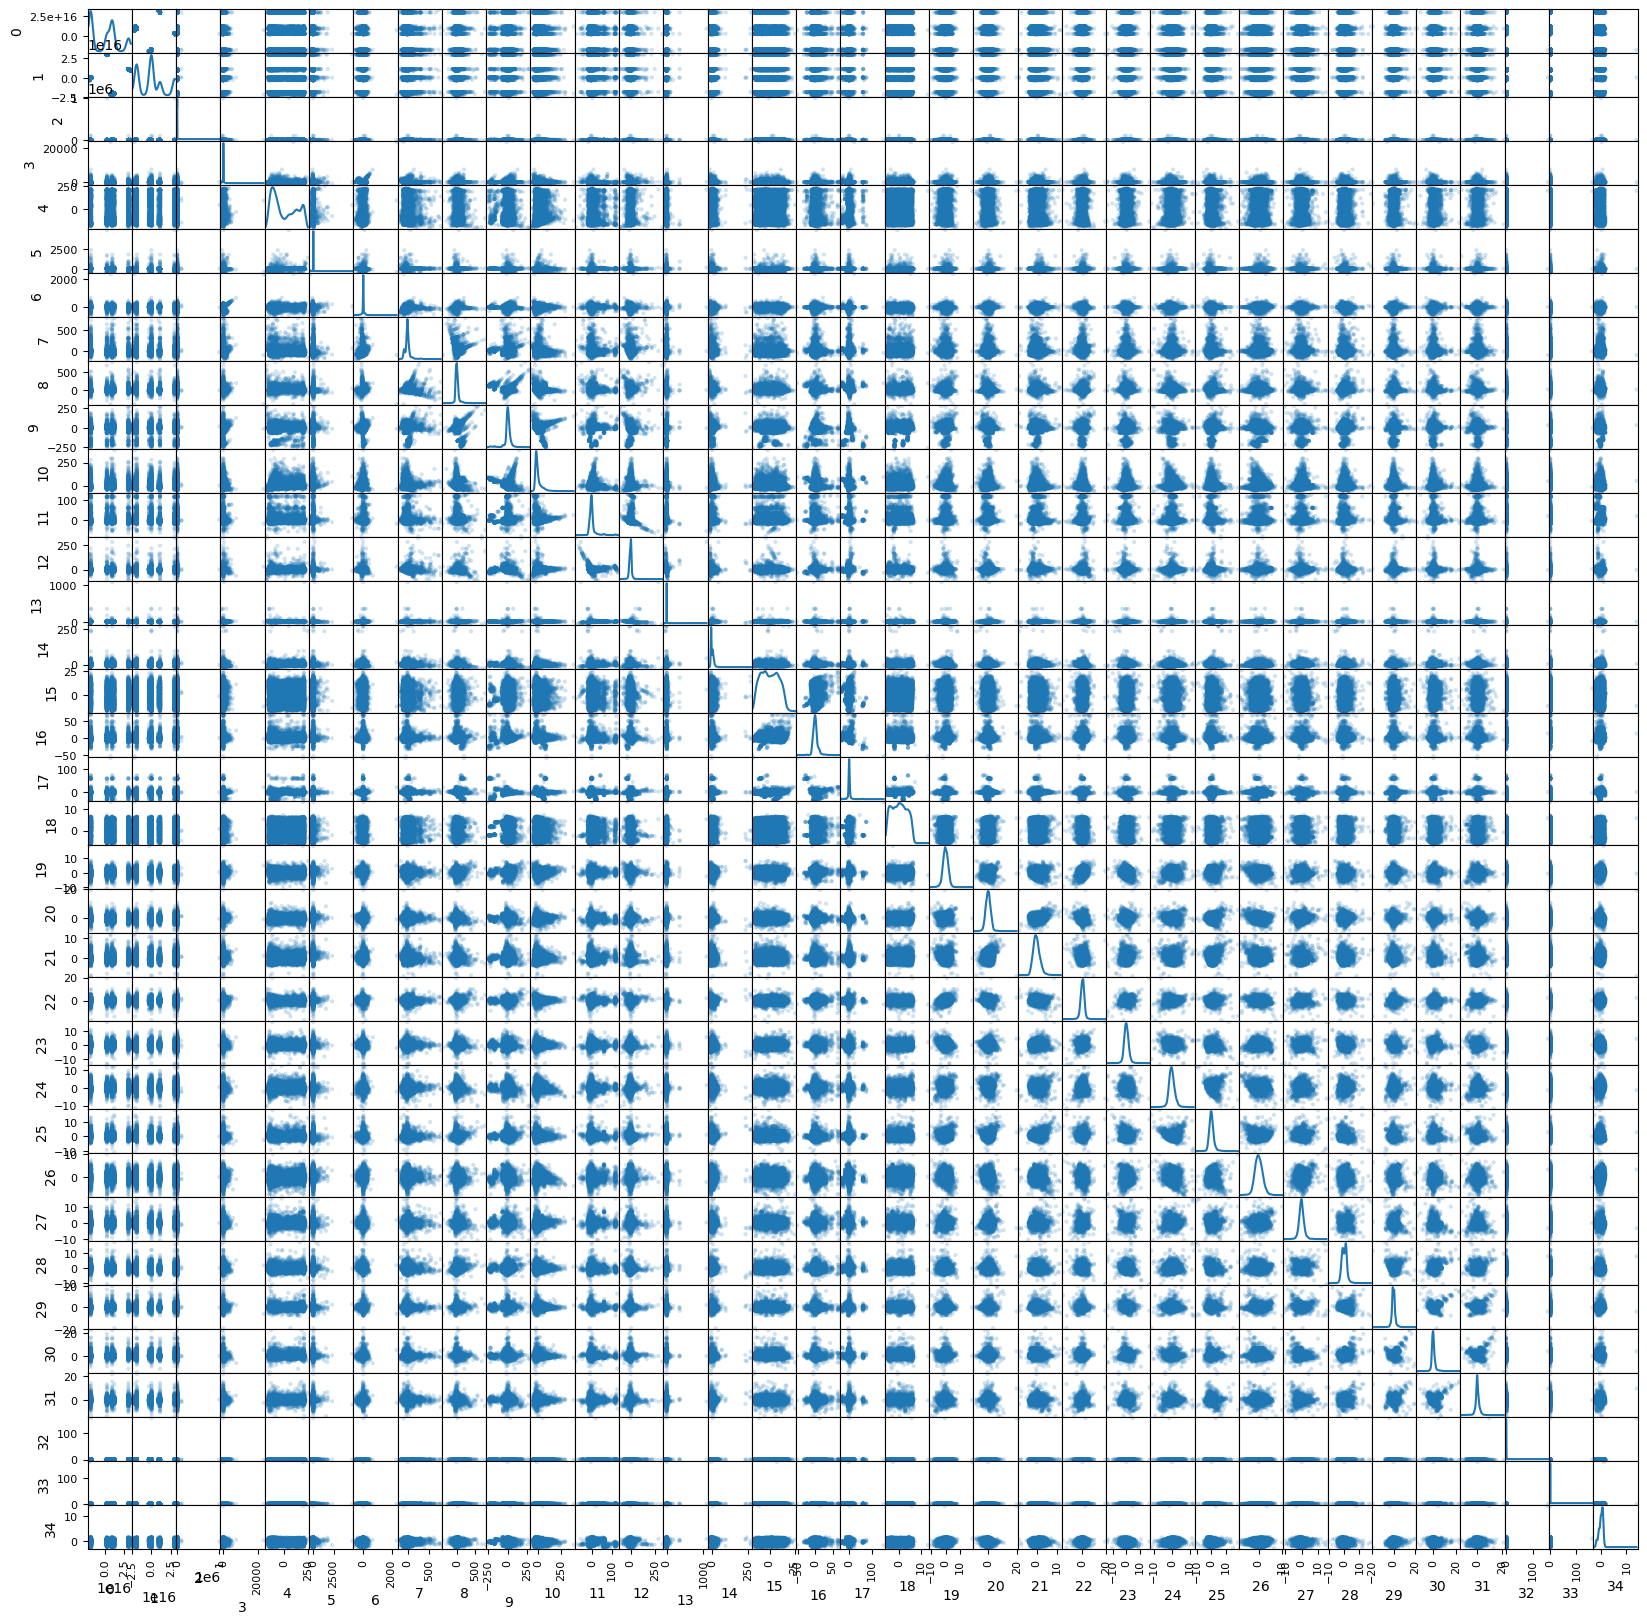

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# ... (Asegúrate de tener definido train_airbnb_df_madrid antes de esta sección)

# Identificar columnas numéricas y no numéricas
numeric_columns = airbnb_df_madrid.select_dtypes(include=['number']).columns
non_numeric_columns = airbnb_df_madrid.select_dtypes(exclude=['number']).columns

# Manejo de valores NaN en columnas numéricas mediante imputación
imputer_numeric = SimpleImputer(strategy='mean')
airbnb_df_madrid_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(airbnb_df_madrid[numeric_columns]), columns=numeric_columns)

# Conservar las columnas no numéricas sin cambios
airbnb_df_madrid_imputed = pd.concat([airbnb_df_madrid_imputed_numeric, airbnb_df_madrid[non_numeric_columns]], axis=1)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA()
airbnb_df_madrid_pca = pca.fit_transform(airbnb_df_madrid_imputed_numeric)

# Ajustar algunos parámetros para reducir complejidad
scatter_matrix(pd.DataFrame(airbnb_df_madrid_pca), alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()




Se realiza un gráfico de la variable objetivo "price" para evaluar su distribución. Durante este proceso, se observa la presencia de valores extremadamente altos, superiores a los 300 euros. Según mi criterio, se considerará que estos valores son atípicos (outliers) y no serán tomados en cuenta para el análisis.

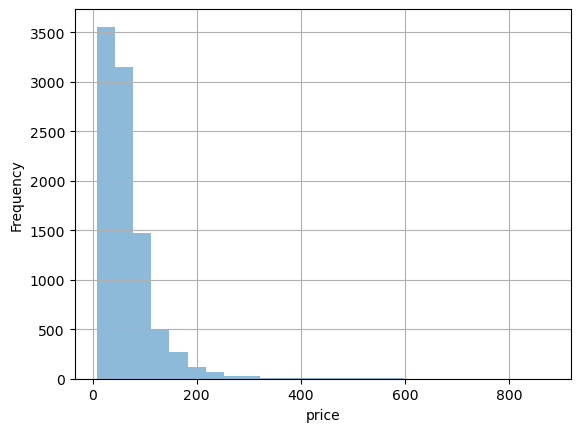

In [349]:
airbnb_df_madrid['price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('price')
plt.show()

Se lleva a cabo la eliminación de valores atípicos en la variable objetivo utilizando filtros.

In [350]:
len(airbnb_df_madrid[airbnb_df_madrid['price'] > 300])

75

In [351]:
airbnb_df_madrid['price'].describe()

count    9246.000000
mean       66.185161
std        57.072069
min         9.000000
25%        31.000000
50%        51.000000
75%        80.000000
max       875.000000
Name: price, dtype: float64

In [352]:
airbnb_df_madrid = airbnb_df_madrid[airbnb_df_madrid['price'] < 300]
airbnb_df_madrid['price'].describe()

count    9157.000000
mean       62.666157
std        42.920487
min         9.000000
25%        30.000000
50%        50.000000
75%        80.000000
max       299.000000
Name: price, dtype: float64

 3. Preprocesamiento:
     - Eliminación de variables, mediante selección (random forest/Lasso), alta
     correlación, alto porcentaje de missings, o el método que se considere oportuno.
     - Generación de variables


Conducimos la selección de variables mediante Random Forest.

In [353]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Definir función para obtener columnas numéricas del dataframe
def obtener_columnas_numericas(df):
    columnas_numericas = df.select_dtypes(include=['int', 'float']).columns
    return list(columnas_numericas)

# Obtener columnas numéricas
columnas_numericas = obtener_columnas_numericas(airbnb_df_madrid)

# Imputar NaN con la media y preparar datos
airbnb_df_madrid_prep = airbnb_df_madrid[columnas_numericas].fillna(airbnb_df_madrid[columnas_numericas].mean())

# Seleccionar características y variable objetivo
features = airbnb_df_madrid_prep.columns.drop(['price'])
X_train = airbnb_df_madrid_prep[features].values
y_train = airbnb_df_madrid_prep['price'].values

# Escalar
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Imprimir la forma de la matriz de características
print(X_train.shape)
print(y_train.shape)

(9157, 34)
(9157,)


Fitting 3 folds for each of 19 candidates, totalling 57 fits
best mean cross-validation score: 0.738
best parameters: {'max_depth': 19}


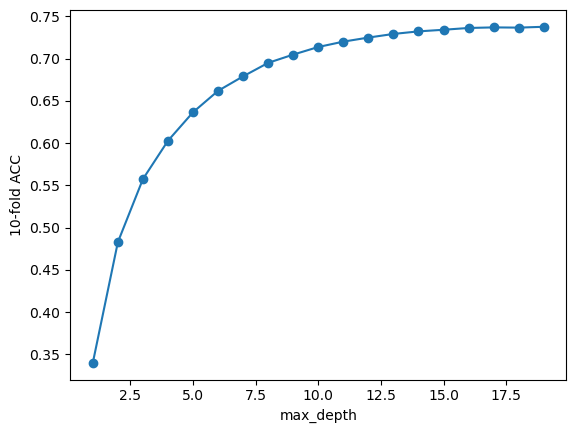

In [355]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,20)
n_estimators = [100, 200, 300, 500, 1000, 1500, 2000]
#tuned_parameters = {'max_depth': maxDepth, 'n_estimators': n_estimators}
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=1) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

El modelo de Random Forest alcanzó su mejor rendimiento durante la validación cruzada a una profundidad máxima del árbol de 19, con un puntaje promedio de 0.738. Este resultado sugiere que el modelo podria generalizar bien a datos no vistos.

In [356]:
maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train) # bajamos porque tiene pinta de overfitting

print("Train: ",rf.score(X_train,y_train))

Train:  0.9481540777468053


El coeficiente de determinación R^2 en los datos de entrenamiento es del 94.8%  esto  indica que la variabilidad en la variable dependiente y_train puede ser explicada usando el modelo de Random Forest. Por otra parte un valor  alto de R^2 tambien podria indicar algun grado de overfitting.

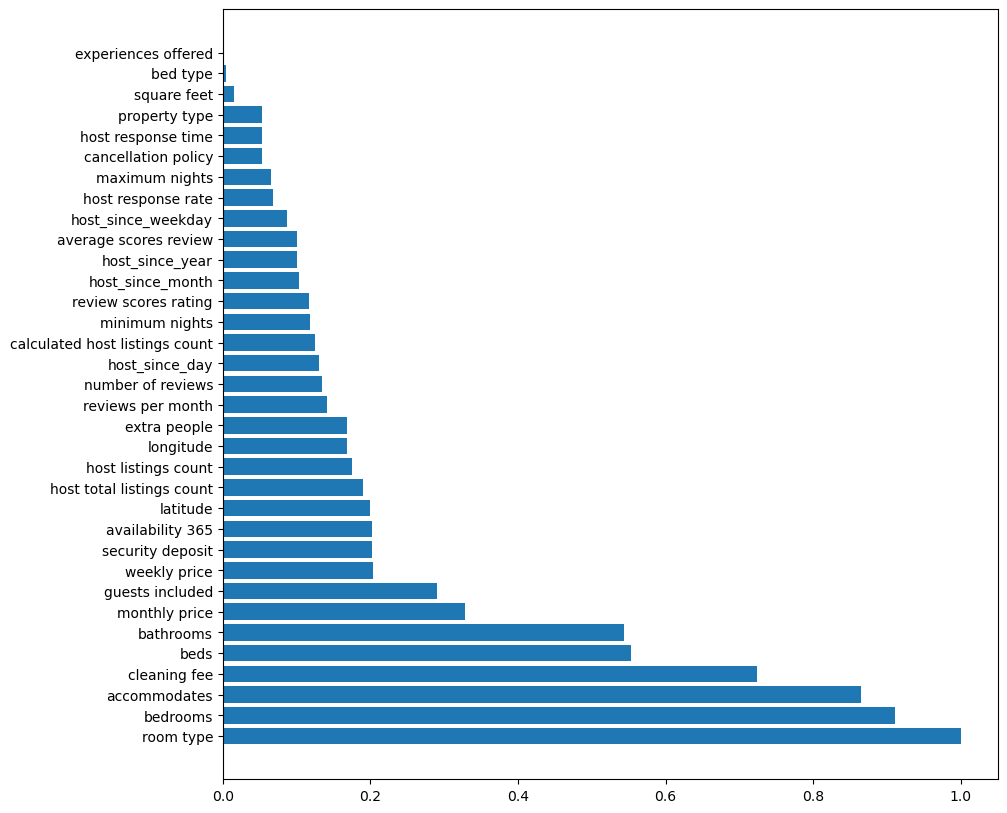

In [357]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Cálculos de pruebas de F y información mutua con el fin de determinar el nivel de importancia.

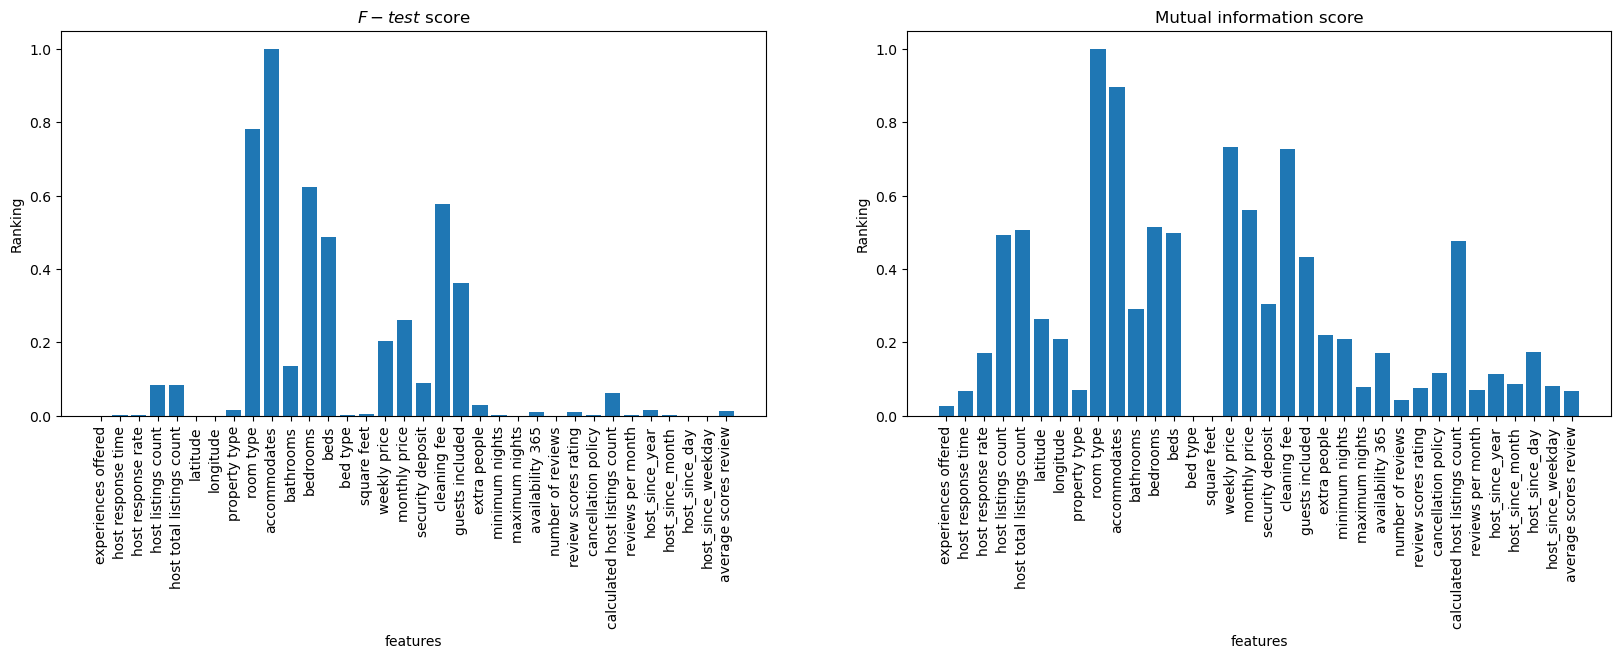

In [358]:
from sklearn.feature_selection import f_regression, mutual_info_regression

# do calculations
f_test, _ = f_regression(X_train,y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train,y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),features, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),features, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Se realiza una búsqueda de hiperparámetros utilizando validación cruzada para encontrar el mejor valor de regularización (alpha) en un modelo Lasso.

best mean cross-validation score: -674.179
best parameters: {'alpha': 0.0727895384398315}


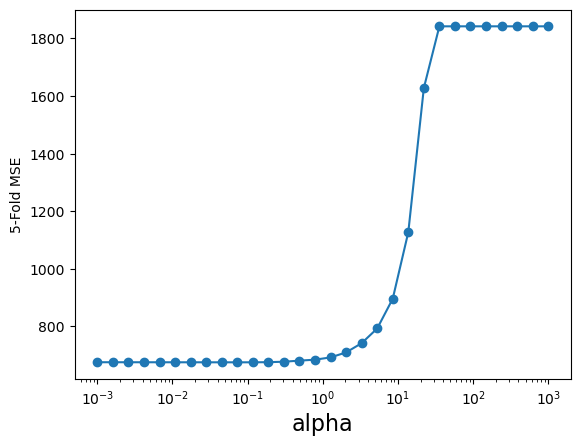

In [359]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-3,3,30)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

Se realiza una búsqueda de hiperparámetros para el modelo GradientBoostingRegressor utilizando la técnica de validación cruzada con GridSearchCV.

En este caso, parece que alpha alrededor de 0.0672 minimiza el MSE. El hecho de que el cross-validation score sea negativo se debe al convenio de scikit-learn de minimizar las funciones de puntuación, y cuanto más negativo sea el valor, mejor es el rendimiento del modelo.

In [360]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

Niterations = [100, 250, 500, 1000]
learningRate = [0.1, 0.05, 0.01]
# Mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}
grid_GradientBoostingRegressor = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv=2, verbose=1)
grid_GradientBoostingRegressor.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_GradientBoostingRegressor.best_score_))
print("best parameters: {}".format(grid_GradientBoostingRegressor.best_params_))


Fitting 2 folds for each of 12 candidates, totalling 24 fits
best mean cross-validation score: 0.744
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


El modelo Gradient Boosting Regressor alcanzó su mejor rendimiento con un puntaje medio de validación cruzada de 0.744, utilizando un learning_rate de 0.1 y n_estimators de 500. Estos hiperparámetros se consideran los mejores para este modelo y conjunto de datos específicos.

Se implementa una matriz de errores de validación cruzada con el proposito de proporcionar información sobre el rendimiento del modelo Gradient Boosting Regressor para diferentes combinaciones de tasas de aprendizaje (learning_rate) y número de iteraciones (n_estimators)

Matriz de errores de validación cruzada:
[[0.27244417 0.25913096 0.25597041 0.26057744]
 [0.2974979  0.26968408 0.26129175 0.25733486]
 [0.4768214  0.34077578 0.29726964 0.274215  ]]


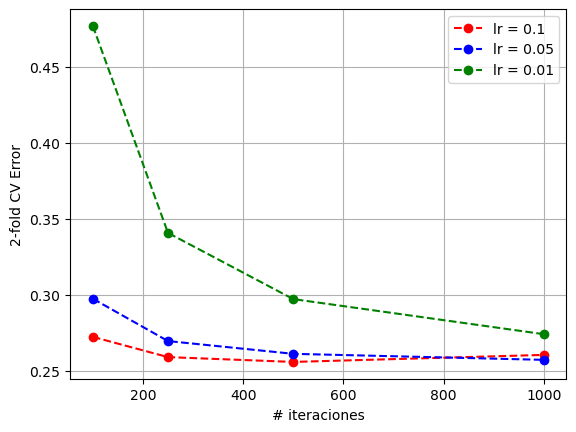

In [361]:
lrOptimo = grid_GradientBoostingRegressor.best_params_['learning_rate']
neOptimo = grid_GradientBoostingRegressor.best_params_['n_estimators']
GradientBoostingRegressor_bt = GradientBoostingRegressor(random_state=0, max_depth=3, learning_rate=lrOptimo, n_estimators=neOptimo)
GradientBoostingRegressor_bt.fit(X_train, y_train)

error_GradientBoostingRegressor_bt = 1 - grid_GradientBoostingRegressor.cv_results_['mean_test_score'].reshape(len(learningRate), len(Niterations))

print("Matriz de errores de validación cruzada:")
print(error_GradientBoostingRegressor_bt)

colors = ['r', 'b', 'g', 'k', 'm']
for i, lr in enumerate(learningRate):
    plt.plot(Niterations, error_GradientBoostingRegressor_bt[i, :], colors[i] + '--o', label='lr = %g' % lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('2-fold CV Error')
plt.grid()
plt.show()


Se visualiza el nivel de importancia relativa de features en un modelo de regresión de Gradient Boosting después de que el modelo ha sido ajustado con los mejores hiperparámetros encontrados durante la búsqueda de hiperparámetro.

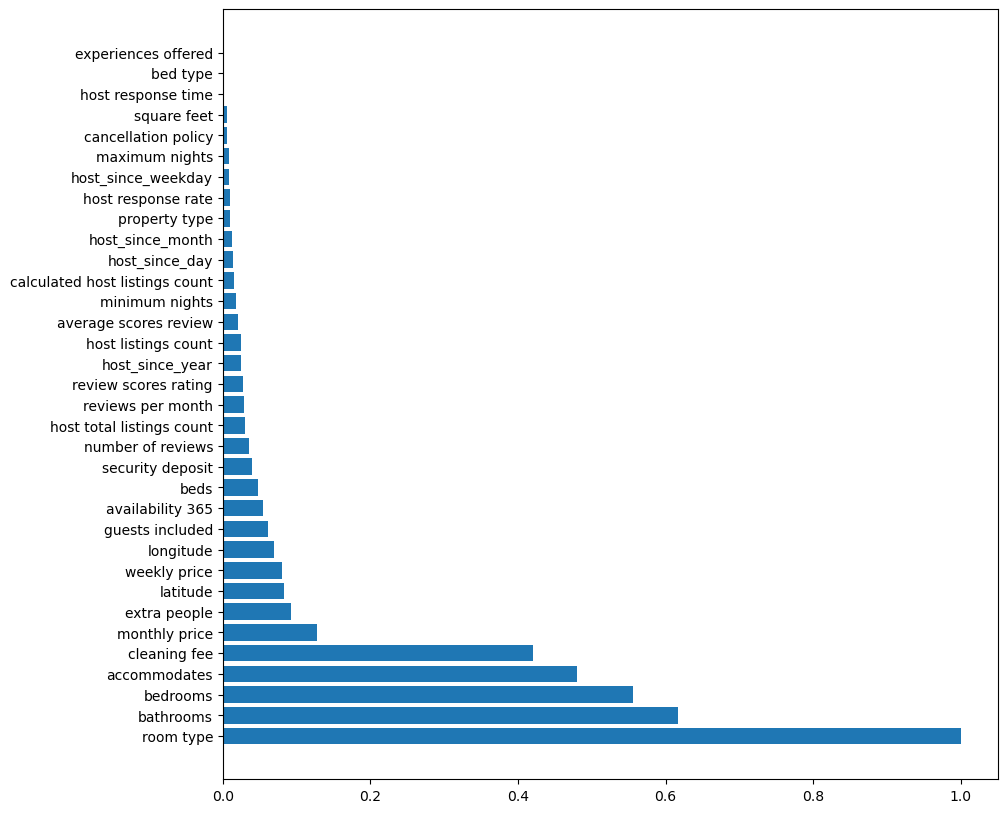

In [362]:
importances = GradientBoostingRegressor_bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Detección de Outliers

Price

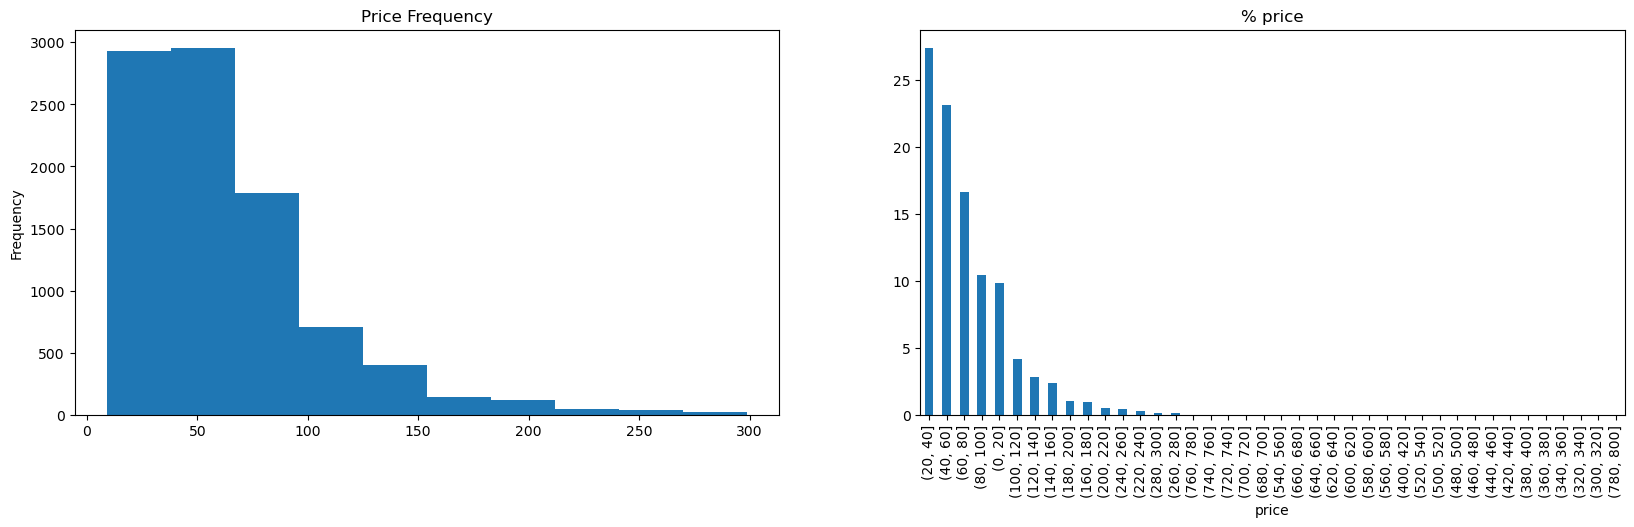

In [363]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 1)
airbnb_df_madrid['price'].plot.hist(title='Price Frequency')
plt.subplot(1,2, 2)
(100 * pd.cut(airbnb_df_madrid['price'], bins=[x for x in range(0, 801, 20)]).value_counts() / len(airbnb_df_madrid['price'])).plot(kind='bar', title='% price')
plt.show() 

In [364]:
min_price = airbnb_df_madrid['price'].min()
max_price = airbnb_df_madrid['price'].max()
print(f"\nPrecio mínimo: {min_price}")
print(f"Precio máximo: {max_price}")
print("La parte de los datos se encuentra en el intervalo de 9 a 100 euros. Se ajustara el rango al nuevo intervalo")


Precio mínimo: 9.0
Precio máximo: 299.0
La parte de los datos se encuentra en el intervalo de 9 a 100 euros. Se ajustara el rango al nuevo intervalo


Property Type

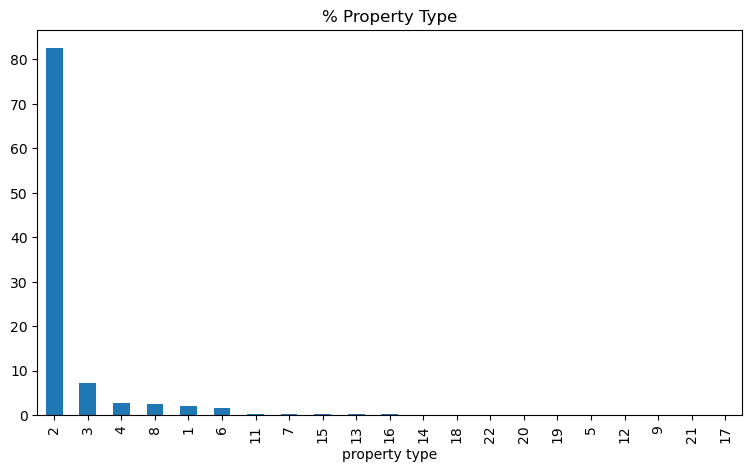

In [365]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 2)
(100 * airbnb_df_madrid['property type'].value_counts() / len(airbnb_df_madrid['property type'])).plot(kind='bar', title='% Property Type')
plt.show()

In [366]:
ordinal_mapping_proType = {
    'Loft': 1,
    'Apartment': 2,
    'House': 3,
    'Condominium': 4,
    'Camper/RV': 5,
    'Other': 6,
    'Dorm': 7,
    'Bed & Breakfast': 8,
    'Tent': 9,
    'Boat': 10,
    'Guesthouse': 11,
    'Villa': 12,
    'Hostel': 13,
    'Townhouse': 14,
    'Chalet': 15,
    'Serviced apartment': 16,
    'Bungalow': 17,
    'Boutique hotel': 18,
    'Guest suite': 19,
    'Casa particular': 20,
    'Timeshare': 21,
    'Earth House': 22
}

for category, ordinal in ordinal_mapping_proType.items():
    print(f'{category}: {ordinal}')
print("Como se puede ver en la grafica anterior el 80% de las propiedades en la data corresponden a Apartamentos")

Loft: 1
Apartment: 2
House: 3
Condominium: 4
Camper/RV: 5
Other: 6
Dorm: 7
Bed & Breakfast: 8
Tent: 9
Boat: 10
Guesthouse: 11
Villa: 12
Hostel: 13
Townhouse: 14
Chalet: 15
Serviced apartment: 16
Bungalow: 17
Boutique hotel: 18
Guest suite: 19
Casa particular: 20
Timeshare: 21
Earth House: 22
Como se puede ver en la grafica anterior el 80% de las propiedades en la data corresponden a Apartamentos


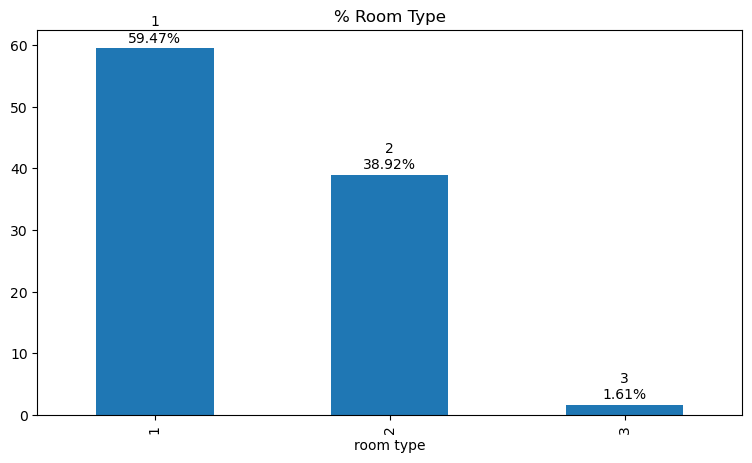

In [367]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * airbnb_df_madrid['room type'].value_counts() / len(airbnb_df_madrid['room type'])
counts = airbnb_df_madrid['room type'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Room Type')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

In [368]:

ordinal_mapping_roomType = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3
}
for category, ordinal in ordinal_mapping_roomType.items():
    print(f'{category}: {ordinal}')
print("El 98.4 % de los tipos de habitación son Entire home/apt o Private Room. ")

Entire home/apt: 1
Private room: 2
Shared room: 3
El 98.4 % de los tipos de habitación son Entire home/apt o Private Room. 


Bed Type

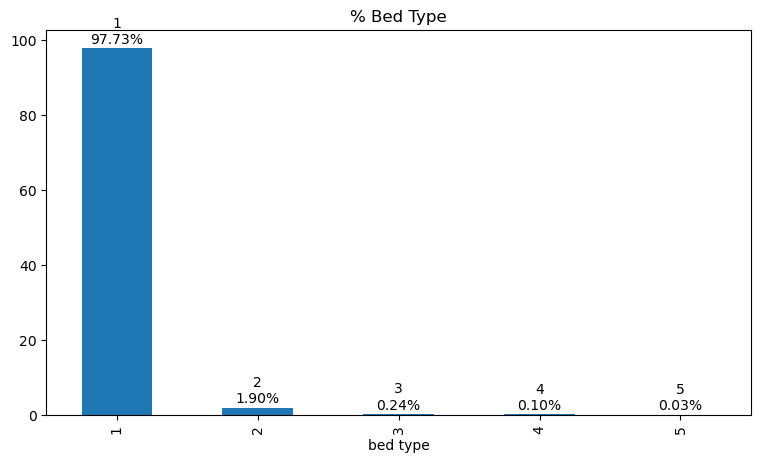

In [369]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * airbnb_df_madrid['bed type'].value_counts() / len(airbnb_df_madrid['room type'])
counts = airbnb_df_madrid['bed type'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Bed Type')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

In [370]:
ordinal_mapping_bedType = {
    'Real Bed': 1,
    'Pull-out Sofa': 2,
    'Futon': 3,
    'Couch': 4,
    'Airbed': 5
}

for category, ordinal in ordinal_mapping_bedType.items():
    print(f'{category}: {ordinal}')
print("El 97.7 % de los tipos de habitación son Real Bed. ")

Real Bed: 1
Pull-out Sofa: 2
Futon: 3
Couch: 4
Airbed: 5
El 97.7 % de los tipos de habitación son Real Bed. 


Cancellation Policy

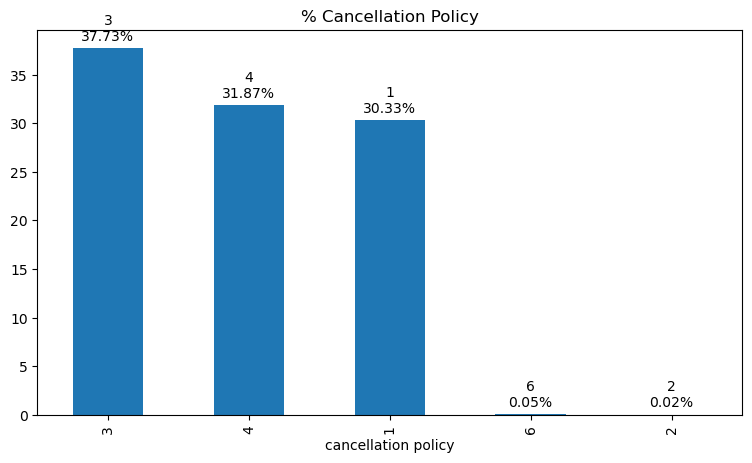

In [371]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
percentage_values = 100 * airbnb_df_madrid['cancellation policy'].value_counts() / len(airbnb_df_madrid['cancellation policy'])
counts = airbnb_df_madrid['cancellation policy'].value_counts()
bars = percentage_values.plot(kind='bar', title='% Cancellation Policy')
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{counts.index[i]}\n{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

In [372]:
ordinal_mapping_cancelPol = {
    'moderate': 1,
    'super_strict_30': 2,
    'strict': 3,
    'flexible': 4,
    'flexible_new': 5,
    'super_strict_60': 6,
    'strict_new': 7,
    'moderate_new': 8
}
for category, ordinal in ordinal_mapping_cancelPol.items():
    print(f'{category}: {ordinal}')
print("El 99.93 % de los politicas de cancelacion son moderate, strict y flexible. ")

moderate: 1
super_strict_30: 2
strict: 3
flexible: 4
flexible_new: 5
super_strict_60: 6
strict_new: 7
moderate_new: 8
El 99.93 % de los politicas de cancelacion son moderate, strict y flexible. 


Caracterización basada en la cantidad de valores nulos.

In [373]:
import pandas as pd

# Contar el número de NaN por columnas
nan_counts = airbnb_df_madrid.isnull().sum()

# Calcular el porcentaje de NaN por columnas
nan_percentage = (nan_counts / len(airbnb_df_madrid)) * 100

# Crear un nuevo DataFrame con la información de NaN y porcentaje
nan_info = pd.DataFrame({
    'NaN Count': nan_counts,
    'NaN Percentage': nan_percentage
})

# Ordenar de mayor a menor porcentaje
nan_info_sorted = nan_info.sort_values(by='NaN Percentage', ascending=False)

# Imprimir la salida completa ordenada
pd.set_option('display.max_rows', None) 
print(nan_info_sorted)

                                NaN Count  NaN Percentage
square feet                          8806       96.166867
monthly price                        6822       74.500382
weekly price                         6794       74.194605
calendar updated                     6793       74.183685
security deposit                     5264       57.486076
cleaning fee                         3725       40.679262
neighbourhood                        3115       34.017691
average scores review                1935       21.131375
review scores rating                 1929       21.065851
reviews per month                    1844       20.137600
host response rate                   1160       12.667904
host response time                   1160       12.667904
amenities                              67        0.731681
bathrooms                              35        0.382221
beds                                   30        0.327618
bedrooms                               11        0.120127
host_since_wee

Opté por excluir la variable "Experiences Offered".

In [374]:
airbnb_df_madrid.drop(['experiences offered'], axis=1, inplace=True)

Matriz de Alta Correlación.

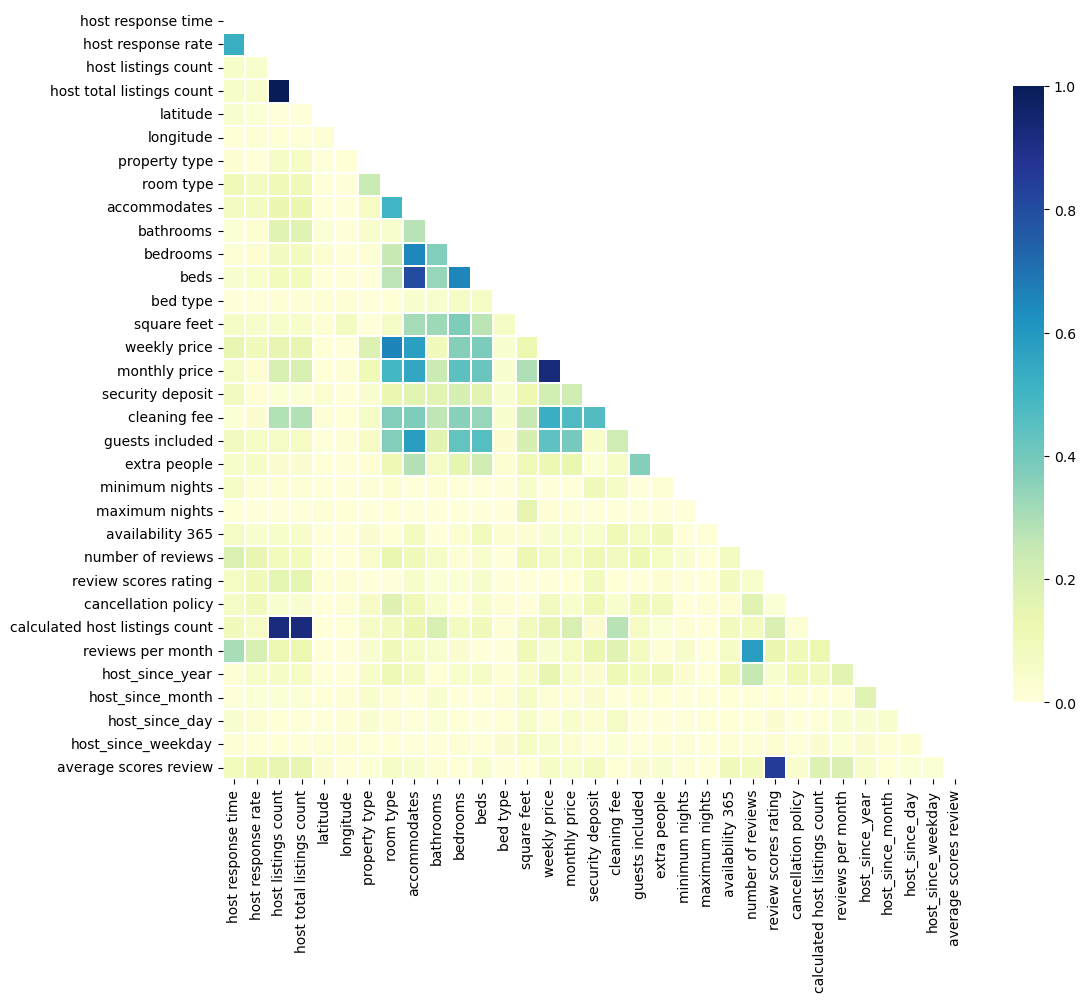

In [375]:
# Compute the correlation matrix
corr = np.abs(airbnb_df_madrid[obtener_columnas_numericas(airbnb_df_madrid)].drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [376]:
airbnb_df_madrid[obtener_columnas_numericas(airbnb_df_madrid)].corr(numeric_only=True)

,host response time,host response rate,host listings count,host total listings count,latitude,longitude,property type,room type,accommodates,bathrooms,bedrooms,beds,bed type,square feet,price,weekly price,monthly price,security deposit,cleaning fee,guests included,extra people,minimum nights,maximum nights,availability 365,number of reviews,review scores rating,cancellation policy,calculated host listings count,reviews per month,host_since_year,host_since_month,host_since_day,host_since_weekday,average scores review
host response time,1.000000,-0.523940,0.053581,0.053581,0.034986,-0.008006,0.024306,0.107784,-0.076882,0.020937,-0.013633,-0.031773,0.003632,-0.061357,-0.038319,-0.143575,-0.067303,0.083741,0.021242,-0.083511,-0.051060,0.059451,-0.008549,0.066308,-0.184529,-0.072964,0.069101,0.094607,-0.301684,-0.011896,0.006534,0.032139,0.014051,-0.092670
host response rate,-0.523940,1.000000,-0.045610,-0.045610,-0.022542,0.015877,-0.002863,-0.081795,0.076755,-0.025701,0.025776,0.045405,0.007683,0.049714,0.028674,0.098839,0.024496,-0.018189,0.030487,0.068056,0.062096,0.017186,0.001021,-0.036738,0.141465,0.100800,-0.094344,-0.065155,0.192136,-0.051617,-0.021084,-0.023797,0.011200,0.121000
host listings count,0.053581,-0.045610,1.000000,1.000000,-0.006955,-0.008601,-0.061395,-0.108882,0.132562,0.170668,0.082193,0.090437,-0.015560,-0.051145,0.220990,0.145870,0.194929,0.023304,0.287290,0.066276,0.027804,0.016762,0.004206,0.052602,-0.093569,-0.155068,0.032785,0.919581,-0.124888,-0.057079,-0.023211,-0.008204,0.011511,-0.148311
host total listings count,0.053581,-0.045610,1.000000,1.000000,-0.006955,-0.008601,-0.061395,-0.108882,0.132562,0.170668,0.082193,0.090437,-0.015560,-0.051145,0.220990,0.145870,0.194929,0.023304,0.287290,0.066276,0.027804,0.016762,0.004206,0.052602,-0.093569,-0.155068,0.032785,0.919581,-0.124888,-0.057079,-0.023211,-0.008204,0.011511,-0.148311
latitude,0.034986,-0.022542,-0.006955,-0.006955,1.000000,0.011956,0.007359,-0.006598,0.002826,-0.023177,-0.024760,-0.001814,0.015247,0.017946,0.002401,0.011663,-0.009811,-0.024167,0.013373,-0.006593,0.009714,0.001745,0.016989,-0.000827,-0.005765,-0.013847,-0.000295,-0.002626,-0.006612,0.006356,-0.010295,-0.007640,-0.016416,-0.030306
longitude,-0.008006,0.015877,-0.008601,-0.008601,0.011956,1.000000,0.010943,-0.006696,-0.000620,-0.007051,-0.001928,-0.003780,0.015248,-0.081709,-0.010460,-0.005785,-0.017619,-0.001925,0.011284,-0.012576,-0.003310,0.005761,-0.010539,-0.001445,0.001260,-0.013196,0.015352,-0.008172,0.006170,-0.001705,-0.013856,-0.011817,-0.012502,-0.007281
property type,0.024306,-0.002863,-0.061395,-0.061395,0.007359,0.010943,1.000000,0.236932,-0.072484,0.044409,-0.022698,0.000996,-0.006893,0.004859,-0.097422,-0.175886,-0.107872,-0.031713,-0.068368,-0.072562,-0.019355,-0.014070,-0.003017,0.029065,-0.042886,-0.001159,0.061205,-0.058950,-0.031888,0.053300,0.045012,-0.037892,-0.008791,-0.022226
room type,0.107784,-0.081795,-0.108882,-0.108882,-0.006598,-0.006696,0.236932,1.000000,-0.501875,0.041311,-0.243408,-0.266986,0.009872,-0.063142,-0.569081,-0.654258,-0.494676,-0.132671,-0.368508,-0.368817,-0.115393,-0.024745,-0.007857,0.011675,-0.135983,-0.007327,0.172732,-0.088548,-0.096848,0.109827,0.016190,-0.017074,0.010656,-0.056611
accommodates,-0.076882,0.076755,0.132562,0.132562,0.002826,-0.000620,-0.072484,-0.501875,1.000000,0.280922,0.645838,0.805641,-0.037117,0.308944,0.616499,0.575842,0.552879,0.157887,0.377331,0.580210,0.284611,-0.002365,-0.003337,0.079075,0.094577,-0.052857,-0.107363,0.132742,0.059004,-0.080870,-0.000583,-0.007734,-0.004149,-0.038956
bathrooms,0.020937,-0.025701,0.170668,0.170668,-0.023177,-0.007051,0.044409,0.041311,0.280922,1.000000,0.373547,0.332937,-0.041194,0.322245,0.277456,0.099195,0.236372,0.161027,0.264477,0.163258,0.070123,0.016361,-0.003644,0.002742,-0.055516,0.021164,0.041799,0.192236,-0.044531,-0.009218,-0.036269,-0.019794,-0.005476,0.012070


In [383]:
colnan=['square feet','monthly price','weekly price','calendar updated','security deposit',
    'cleaning fee','neighbourhood','average scores review',
    'review scores rating','reviews per month','host response rate',
    'host response time','amenities','bathrooms','beds','bedrooms',
    'host_since_weekday','host_since_day','host_since_month',
    'host_since_year','host total listings count','host listings count']

colemptyval=['host response time','host response rate','host listings count',
    'host total listings count','neighbourhood','neighbourhood cleansed','minimum nights',
    'maximum nights','calendar updated','availability 365',
    'cancellation policy','calculated host listings count','reviews per month']

In [384]:
def elimina_columnas(df, columnas):
    df = df.drop(columns=columnas, errors='ignore')
    return df

def prepoc_df(df):
    # Longitud y Latitud centro Madrid para calcular la distancia haversine
    centro_madrid_lat = 40.41831
    centro_madrid_lon = -3.70275
    
    # Quitamos las columnas con su mayoría de variables a nulos
    df_1 = elimina_columnas(df, colNaN)
    
    # Quitamos aquellas variables que no aportan valor a la solución del problema
    df_2 = elimina_columnas(df_1, colEmptyVal)
    
    # Nos quedamos solo con los apartamentos
    df_3 = df_2[df_2['property type'] == 2]  # Apartment
    
    # Room type diferente a shared
    df_3 = df_3[df_3['room type'] != 3] # Shared room
    
    # Bed type igual a Real bed
    df_3 = df_3[df_3['bed type'] == 1] # Real Bed
    
    # Price entre 9 y 100 €
    df_3 = df_3[(df_3['price'] > 9) & (df_3['price'] <= 100)]
    
    # Aplicamos distancia haversine para saber a qué distancia del centro están
    df_3 = df_3.assign(Centro=lambda x: haversine_distance(x['latitude'], x['longitude'], centro_madrid_lat, centro_madrid_lon))
    
    # Eliminamos columnas las cuales hemos generado nuevas variables
    df_3 = elimina_columnas(df_3, ['longitude', 'latitude'])
    
    return df_3

df_train_prepoc = prepoc_df(airbnb_df_madrid)
df_test_prepoc = prepoc_df(test_airbnb_df)



In [385]:
#Aplicamos la media a valores nulos
df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)] = df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].fillna(df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].mean())
df_test_prepoc[obtener_columnas_numericas(df_test_prepoc)] = df_test_prepoc[obtener_columnas_numericas(df_test_prepoc)].fillna(df_train_prepoc[obtener_columnas_numericas(df_test_prepoc)].mean())


#Creación X_train , y_train , X_test e y_test
features = df_train_prepoc[obtener_columnas_numericas(df_train_prepoc)].columns.drop(['price'])
X_train = df_train_prepoc[features].values
y_train = df_train_prepoc['price'].values
X_test  = df_test_prepoc[features].values
y_test  = df_test_prepoc['price'].values


#Escalamos (con los datos de train)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

KeyError: "['id', 'host id', 'availability 30', 'availability 60', 'availability 90', 'review scores accuracy', 'review scores cleanliness', 'review scores checkin', 'review scores communication', 'review scores location', 'review scores value'] not in index"

 4. Modelado:
     - Cross validation
     - Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis comparar entre ellos.


 5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente